# Introduction

An algorithm is a step-by-step structured 'recipe' of calculations (operations) for solving a problem. 
Algorithms are important in computing because this is what computers do - perform structured 
sets of operations. To solve a problem using a computer we need an *algorithm*.

Our computer programs are the expression of algorithms in a computing language.
Almost everything you have done so far has been an algorithm. Now we want to identify
more carefully some algorithms, and how we can describe them. This is a step towards 
*algorithmic complexity*, which is in the next notebook.


## Characterising algorithms

There is usually more than one way to solve a problem, hence there will
usually be more than one algorithm to solve a given problem. Some algorithms may be fast but
inaccurate, others slow and accurate; some can be fast but use a lot of memory, while others may be 
low-memory but slower. Some will be simple to program, others much harder.
We will look more at characterising the performance of algorithms in the next notebook on 
*algorithmic complexity*.  For now we will focus on turning descriptions of algorithms 
into computer implementations.


## Objectives

- Develop appreciation of what an algorithm is
- Learn to create an algorithm to solve a problem
- Use *pseudocode* to describe algorithms

We will be using NumPy is this notebook, so we import it now:

In [1]:
import numpy as np

# Pseudocode

*Pseudocode* is commonly used to express algorithms. It involves presenting an algorithm in a way that
resembles a high-level programming language, like Python. Pseudocode is not formally defined, but uses 
control statements and loops that you are now familiar with.

In Activity 02, you worked on implementing a bisection algorithm. A presentation of a bisection algorithm
in pseudocode can be found at https://en.wikipedia.org/wiki/Bisection_method#Algorithm, which we reproduce here:

```
INPUT: Function f, endpoint values a, b, tolerance TOL, maximum iterations NMAX
CONDITIONS: a < b, either f(a) < 0 and f(b) > 0 or f(a) > 0 and f(b) < 0
OUTPUT: value which differs from a root of f(x)=0 by less than TOL 

N ← 1
While N ≤ NMAX # limit iterations to prevent infinite loop
  c ← (a + b)/2 # new midpoint
  If f(c) = 0 or (b – a)/2 < TOL then # solution found
    Output(c)
    Stop
  EndIf
  N ← N + 1 # increment step counter
  If sign(f(c)) = sign(f(a)) then a ← c else b ← c # new interval
EndWhile
Output("Method failed.") # max number of steps exceeded
```

Python syntax is close to a form of pseudocode, so we will generally present algorithms using Python syntax.
From an algorithm in pseudocode it is usually straightforward to produce a working Python program.

# Search

Some classic algorithms involve searching in a list.
Often, we need to know if a value exists in a list. We have already seen something like this with the Python built-in types, `dict` and `list` where we can say '`x in y`', e.g.:

In [2]:
# Create a list
y = [4, 2, 1, 3, 5]

# Check if '2' is in the list y
print(2 in y)

# Check if '2.5' is in the list y
print(2.5 in y)

True
False


Behind this syntax is an *algorithm* for performing the search. There are different ways to search, and the speed of a search can depend heavily on the algorithm. The speed of a given algorithm for a problem can depend on the nature of the data, how it is stored, and how many search operations we want to perform.

## Linear search

The simplest search is linear search, where we iterate over all entries in a list/tuple/dictionary, etc, and check for the value(s) we are looking for. Here is an example of searching if a given colour is in a list:

In [3]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

my_colours = ["yellow", "green", "blue", "orange", "purple"]

print(linear_search(my_colours, "blue"))
print(linear_search(my_colours, "black"))

True
False


This is a very simple algorithm. It is generally fast for short lists, but might not be the best approach for long lists.

## Binary search

Linear search does not place any requirements on the order of the data, i.e. on the list we are searching. 
However, if we have a list that is *sorted*, such as a list of names sorted into alphabetical order,
rather than using a linear search we can do something cleverer and perform a *binary search* (https://en.wikipedia.org/wiki/Binary_search_algorithm).

Binary search has similarities to bisection, that we have seen before. If we want to check if `y` is in 
the *sorted* array `x` of length `n`, we:

1. Check that the search value `y` is possibly in the array by checking that it lies between 
   the end values of `x`.
1. Set lower bound position to 0 and upper bound position to `n`-1
1. Evaluate the midpoint value of `x` , and determine if `y` lies to the left or right of 
   the mid-point.
   - if `y < x[mid]`, then set the upper bound position equal to the midpoint position - 1 
   - else if `y > x[mid]`, then set the lower bound position equal to the midpoint position + 1  
   - else if `y == x[mid]`, then we have found `y`, so return position `mid`
   - else if upper bound position < lower bound position, then `y` cannot be in the list, so return `None`

### Example

Consider the ordered array `x` of length 9:

| position  | 0 | 1 | 2 | 3 | 4  | 5  | 6  |  7 | 8  |
|-----------|---|---|---|---|----|----|----|----|-----
| value     | 2 | 5 | 7 | 8 | 32 | 34 | 47 | 52 | 61 |

We want to check if 52 is in the array, and if so in which position. The process is as follows: 

1. `upper=8, lower=0 -> midpoint=(8+0)/2=4` 
2. `x[8 (upper)]=61, x[0 (lower)]=2, x[4 (midpoint)]= 32 -> upper=8, lower=4+1=5, midpoint=(8+5)/2=6`  
3. `x[8 (upper)]=61, x[5 (lower)]=34, x[6 (midpoint)]= 47 -> upper=8, lower=6+1=7` 
4. `x[8 (upper)]=61, x[7 (lower)]=52 -> return 7 (position of 52)` 

### Implementation

A Python implementation of the binary sort algorithm is below. When implementing an algorithm, particular care needs to be taken with initialising values, updating at the appropriate points, and avoiding infinite loops.

In [4]:
def binary_search(x, y):
    "Peform binary search on x to find y. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If value is outside of interval, return None 
    if y < x[lower] or y > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] y lies, and update midpoint accordingly
        if y < x[midpoint]:
            upper = midpoint - 1
        elif y > x[midpoint]:
            lower = midpoint + 1
        elif y == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

We now add some tests to check that our algorithm is functioning correctly:

In [5]:
# Generate an array of sorted integers
x = np.array([-19, -15, -12,  -8,  -7,  -6,  -4 ,  1,  2,   8,   9,  15,  15,  18,  22])

# Test for values we know are in the array
assert binary_search(x, x[0]) == 0 
assert binary_search(x, x[2]) == 2 
assert binary_search(x, x[7]) == 7 
assert binary_search(x, x[14]) == 14 

# Test for values we know are outside the array interval
assert binary_search(x, -21) == None 
assert binary_search(x, 38) == None 

# Test for values we know are not in the array but are inside the array interval
assert binary_search(x, -11) == None
assert binary_search(x, 12) == None
assert binary_search(x, 21) == None

For large sorted arrays, binary search is much faster than linear search. We will look at this more in the next notebook. It does however rely on having a sorted array. If an array is unordered and we need to do a large number of searches, rather than using linear search it may be more efficient to first sort the array, and then use binary search.

# Sorting

Another classic algorithmic problem is sorting. There are numerous sort algorithms listed at https://en.wikipedia.org/wiki/Sorting_algorithm. The reason for multiple algorithms is that there is no universal *best*. The appropriate algorithm depends on the problem - maybe the size of the problem,
any pre-existing (partial) ordering, or even the CPU or memory (RAM) type.

We will consider two classic sorting algorithms - bubble sort and quicksort. Bubble sort is educational, 
and quicksort is widely used in practice.

## Bubble Sort

One of the simplest sorting algorithms is bubble sort. We just iterate over values in an array, and if any neighbours are in the wrong order we swap them. To sort the entire list, we have to repeat this process many times. 

Here is a pseudocode implementation of bubble sort:

```
procedure bubbleSort( A : list of sortable items )
    N ← length(A)
    repeat
       for i = 1 to N-1 inclusive do
          if A[i] > A[i+1] then
             swap(A[i], A[i+1])
          end if
       end for
       N ← N - 1
    until N = 0
end procedure
```

Note that this pseudocode assumes that the list `A` has entries indexed from `1` to `N`. 
This is because some languages, e.g. Fortran and MATLAB, use '1' for the index of the first entry in an array. Python, C, and numerous other languages use '0' as the index for the first entry in an array.
Because different languages have different conventions, it is important to pay attention to details like this when reading pseudocode. Mistakes due to 0-based or 1-based indexing are common, sufficiently so that there is a name for
such an error - 'off-by-one error'.

Below is an implementation of bubble sort in Python:

In [6]:
def bubble_sort(A):
    "Sort A and return"

    # Make a copy of A    
    A = A.copy()

    # Perform sorting    
    N = len(A)
    while N > 0:
        for i in range(N - 1):
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[i + 1]
        N = N - 1

    return A

We can test our bubble sort implementation with some random data:

In [7]:
# Generate array of 20 random values
x = np.random.rand(20)

# Sort array and print
print(bubble_sort(x))

[ 0.08225323  0.21944973  0.24796889  0.32518354  0.41310776  0.46228566
  0.55820494  0.7295902   0.73083123  0.75096013  0.78453587  0.80845773
  0.81201345  0.82416494  0.82848476  0.83349141  0.86709379  0.88131367
  0.94093037  0.96145487]


Bubble sort is not a sophisticated algorithm, and as we will see, it is very inefficient for large lists. But, it performs the task. Performance is not always a concern. We just need implementations that are sufficiently fast for a given application. If performance is not critical, clarity and simplicity of the code should be prized.

## Quicksort

A widely used algorithm for sorting, developed in 1959, is *quicksort*. It is known as a 'divide and conquer' type algorithm. It essentially picks a value in the array (the pivot), and partitions the entries into two groups; those less than the pivot and those greater than or equal to the pivot. It then repeats the process on each group. This make quicksort a *recursive* algorithm.

Below is the quicksort algorithm in pseudocode, taken from https://en.wikipedia.org/wiki/Quicksort#Lomuto_partition_scheme:

```
algorithm quicksort(A, lo, hi) is
    if lo < hi then
        p := partition(A, lo, hi)
        quicksort(A, lo, p – 1)
        quicksort(A, p + 1, hi)

algorithm partition(A, lo, hi) is
    pivot := A[hi]
    i := lo        // place for swapping
    for j := lo to hi – 1 do
        if A[j] ≤ pivot then
            swap A[i] with A[j]
            i := i + 1
    swap A[i] with A[hi]
    return i
```

The algorithm is started with `quicksort(A, 0, len(A)-1)`

We implement this now in Python:

In [8]:
import numpy as np
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        A = A.copy()
        hi = len(A) - 1

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

We do not want to focus on details of the quicksort algorithm, but do wish to highlight the close resemblance between the pseudocode and the Python implementation.

We now test the implementation for an array of random numbers:

In [9]:
x = np.random.rand(10)
print("Unsorted:", x)

y = quicksort(x)
print("Sorted:", y)

Unsorted: [ 0.20576051  0.39167098  0.38543208  0.38607336  0.88664334  0.95076356
  0.92249098  0.16783818  0.85451023  0.3900841 ]
Sorted: [ 0.16783818  0.20576051  0.38543208  0.38607336  0.3900841   0.39167098
  0.85451023  0.88664334  0.92249098  0.95076356]


## Sort performance 

Bubble sort and quicksort both sort arrays. So which is better? Let's test 
the performance on an array of 5,000 random numbers:

In [10]:
data = np.random.rand(5000)

We first time bubble sort, using the magic command [`%time`](Notebook%20tips.ipynb#Simple-timing) to get the execution time:

In [11]:
%time x = bubble_sort(data)

CPU times: user 6.61 s, sys: 22.7 ms, total: 6.64 s
Wall time: 6.64 s


And now quicksort:

In [12]:
%time x = quicksort(data)

CPU times: user 40.6 ms, sys: 1.79 ms, total: 42.4 ms
Wall time: 40.9 ms


Clearly, quicksort is *much* faster than bubble sort. 

Finally, we test the NumPy quicksort function:

In [13]:
%time x = np.sort(data, kind='quicksort')

CPU times: user 834 µs, sys: 509 µs, total: 1.34 ms
Wall time: 551 µs


The NumPy implementation is considerably faster than our implementation of quicksort.

# Summary

We have looked at search and sorting as examples of algorithms.
Sometimes we need to write algorithms for a
specialised problem. However, for common algorithms like search and sorting always use the built-in/library versions. These will be faster and better tested.

# Exercises

## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function, e.g.
```python
def min_max(x):
    # Implement your algorithm here
    return x_min, xmax
```    

To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


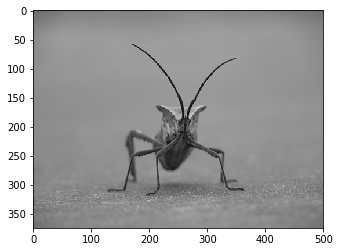

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array and 
returns the 
filtered image. With this particular filter, the value of a pixel in the filtered image is equal to the average value
of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, the neighbours are 
`[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```